In [97]:
# Installer/mettre √† jour les librairies n√©cessaires
!pip install --upgrade pandas scikit-learn matplotlib seaborn numpy plotly --force-reinstall

# Importer les biblioth√®ques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none

In [101]:
# Import des biblioth√®ques n√©cessaires
import pandas as pd


# Lire le fichier train.csv et test.csv
df = pd.read_csv("train.csv")
file2 = pd.read_csv("test.csv")

# Afficher les premi√®res lignes du dataset
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [102]:
# Compter les valeurs manquantes dans chaque colonne
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [103]:
file2.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [104]:
# Importation des biblioth√®ques n√©cessaires pour l'encodage
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# V√©rification si les colonnes 'Sex' et 'Embarked' existent dans le DataFrame
if 'Sex' in df.columns and 'Embarked' in df.columns:
    
    # **1. Label Encoding pour la colonne "Sex"**
    # Le LabelEncoder transforme les cat√©gories en valeurs num√©riques (ex : 'male' -> 1, 'female' -> 0).
    # Cela est utile pour les mod√®les qui ne peuvent pas traiter des donn√©es cat√©gorielles directement.
    label_encoder = LabelEncoder()
    df['Sex_Encoded'] = label_encoder.fit_transform(df['Sex'])  # Cr√©ation d'une nouvelle colonne encod√©e pour "Sex"

    # **2. One-Hot Encoding pour la colonne "Embarked"**
    # Le OneHotEncoder transforme chaque valeur de la colonne en une nouvelle colonne binaire (0 ou 1) pour chaque cat√©gorie.
    # Par exemple, la colonne "Embarked" avec les valeurs ['C', 'Q', 'S'] sera transform√©e en 3 nouvelles colonnes.
    one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    one_hot_encoded = one_hot_encoder.fit_transform(df[['Embarked']])  # Appliquer One-Hot Encoding sur la colonne "Embarked"

    # Convertir le tableau numpy r√©sultant en DataFrame pour avoir des noms de colonnes clairs et compr√©hensibles
    # `get_feature_names_out()` g√©n√®re les noms des colonnes √† partir des cat√©gories pr√©sentes dans "Embarked" (C, Q, S)
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))

    # Ajouter les nouvelles colonnes encod√©es au DataFrame existant
    # Cette √©tape permet d'ajouter les colonnes binaires cr√©√©es par One-Hot Encoding au DataFrame original
    df = pd.concat([df, one_hot_encoded_df], axis=1)

    # Supprimer les colonnes originales "Sex" et "Embarked" si elles ne sont plus n√©cessaires
    # Cela permet de ne conserver que les versions encod√©es des colonnes
    df.drop(columns=['Sex', 'Embarked'], inplace=True)

    # Afficher les premi√®res lignes du DataFrame apr√®s l'encodage
    print("\nApr√®s encodage :")
    print(df.head())  # V√©rifier les r√©sultats

else:
    # Si l'une ou les deux colonnes 'Sex' ou 'Embarked' ne sont pas pr√©sentes, afficher un message d'erreur
    print("Erreur : Les colonnes 'Sex' et/ou 'Embarked' ne sont pas pr√©sentes dans le fichier CSV.")



Apr√®s encodage :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_Encoded  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN            1         0.0         0.0   
1          PC 17599  71.2833   C85            0         1.0         0.0   
2  STON/O2. 3101282   7.9250   NaN            0         0.0         0.0   
3      

In [105]:
# V√©rifier les colonnes du DataFrame
print("Colonnes du DataFrame :", df.columns)

# V√©rifier les valeurs manquantes avant imputation
print("\nValeurs manquantes avant imputation :")
print(df.isnull().sum())

# Imputation des colonnes num√©riques
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Remplace NaN par la m√©diane

if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())  # Remplace NaN par la moyenne

# V√©rifier si les colonnes encod√©es d'Embarked existent
if all(col in df.columns for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']):
    print(df[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']].head())
    df.drop(columns=['Embarked_nan'], inplace=True)

# Imputation de la colonne 'Cabin'
if 'Cabin' in df.columns:
    df['Cabin'] = df['Cabin'].fillna('Unknown')  # Remplace NaN par "Unknown"

# V√©rifier les valeurs manquantes apr√®s imputation
print("\nValeurs manquantes apr√®s imputation :")
print(df.isnull().sum())


Colonnes du DataFrame : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_Encoded', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_nan'],
      dtype='object')

Valeurs manquantes avant imputation :
PassengerId       0
Survived          0
Pclass            0
Name              0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Sex_Encoded       0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64
   Embarked_C  Embarked_Q  Embarked_S  Embarked_nan
0         0.0         0.0         1.0           0.0
1         1.0         0.0         0.0           0.0
2         0.0         0.0         1.0           0.0
3         0.0         0.0         1.0           0.0
4         0.0         0.0         1.0           0.0

Valeurs manquantes apr√®s imputation :
PassengerId    0
Survived       0
Pclass         0
Name   

In [106]:
scaler = StandardScaler()  # Centrage-r√©duction (moyenne=0, variance=1)

# Liste des variables num√©riques √† transformer
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Appliquer le scaler sur les colonnes s√©lectionn√©es
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# V√©rification apr√®s transformation
print(df[numerical_features].describe())  # V√©rifier les nouvelles valeurs

                Age          Fare         SibSp         Parch
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -5.657365e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.046374e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    4.333115e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.891554e+00  9.667167e+00  6.784163e+00  6.974147e+00


In [107]:
#1. Statistiques descriptives
print(df.describe())  # Moyenne, m√©diane, quartiles, etc.
print(df.info())  # V√©rifier les types de donn√©es et les valeurs manquantes
print(df.isnull().sum())  # V√©rifier les valeurs manquantes

       PassengerId    Survived      Pclass           Age         SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  8.910000e+02   
mean    446.000000    0.383838    2.308642  2.272780e-16  4.386066e-17   
std     257.353842    0.486592    0.836071  1.000562e+00  1.000562e+00   
min       1.000000    0.000000    1.000000 -2.224156e+00 -4.745452e-01   
25%     223.500000    0.000000    2.000000 -5.657365e-01 -4.745452e-01   
50%     446.000000    0.000000    3.000000 -1.046374e-01 -4.745452e-01   
75%     668.500000    1.000000    3.000000  4.333115e-01  4.327934e-01   
max     891.000000    1.000000    3.000000  3.891554e+00  6.784163e+00   

              Parch          Fare  Sex_Encoded  Embarked_C  Embarked_Q  \
count  8.910000e+02  8.910000e+02   891.000000  891.000000  891.000000   
mean   5.382900e-17  3.987333e-18     0.647587    0.188552    0.086420   
std    1.000562e+00  1.000562e+00     0.477990    0.391372    0.281141   
min   -4.736736e-01 -6.484217e-01    

<Figure size 1200x800 with 0 Axes>

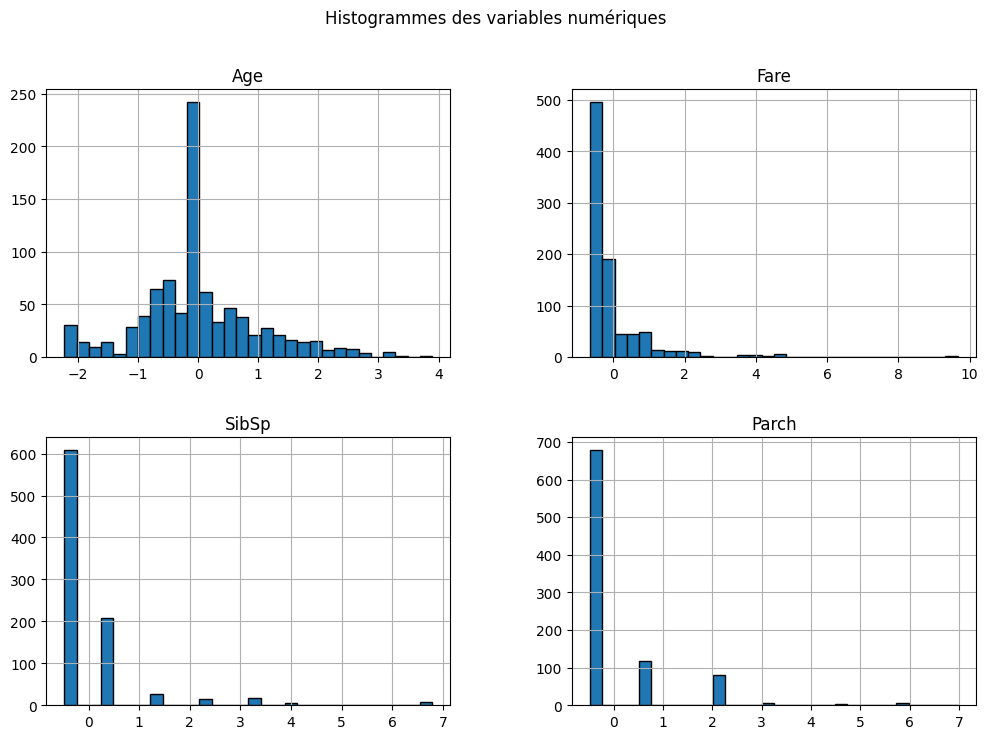

In [109]:
# Histogrammes pour toutes les variables num√©riques
plt.figure(figsize=(12, 8))
df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle('Histogrammes des variables num√©riques')
plt.show()


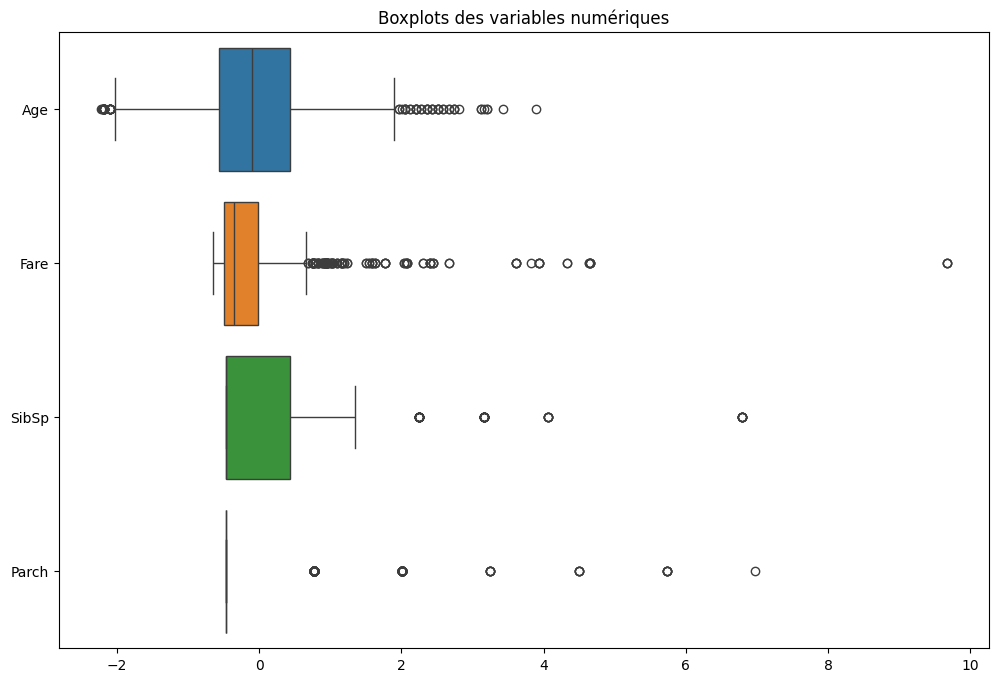

In [110]:
# Boxplot pour toutes les variables num√©riques
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']], orient='h')
plt.title('Boxplots des variables num√©riques')
plt.show()


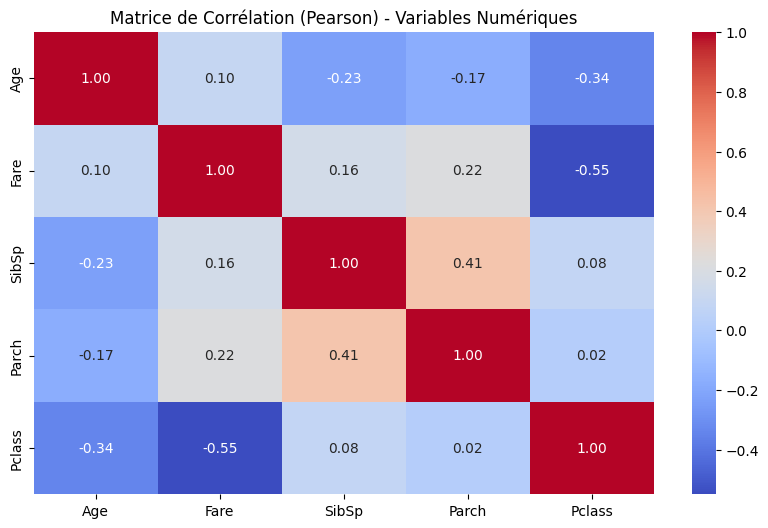

In [111]:
# S√©lection des variables num√©riques
num_features = ["Age", "Fare", "SibSp", "Parch", "Pclass"]  # Pclass est ordinal, on peut le consid√©rer ici aussi

# Matrice de corr√©lation Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corr√©lation (Pearson) - Variables Num√©riques")
plt.show()


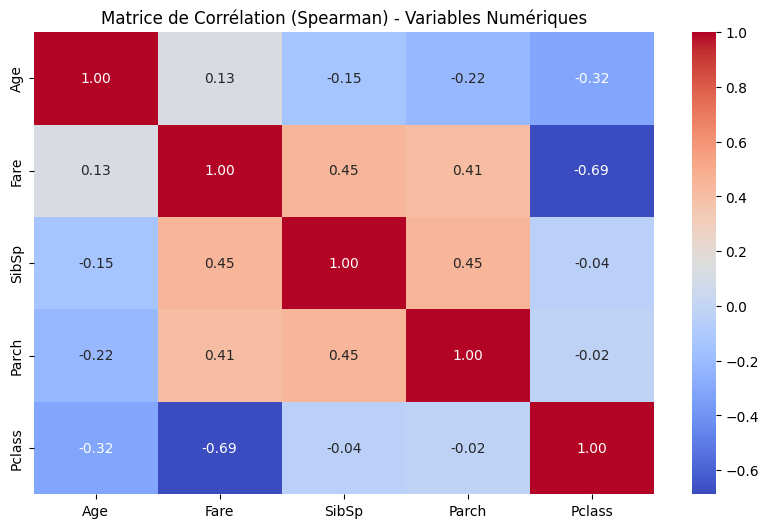

In [112]:
# Matrice de corr√©lation Spearman (utile si les relations ne sont pas lin√©aires)
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corr√©lation (Spearman) - Variables Num√©riques")
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_Encoded', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


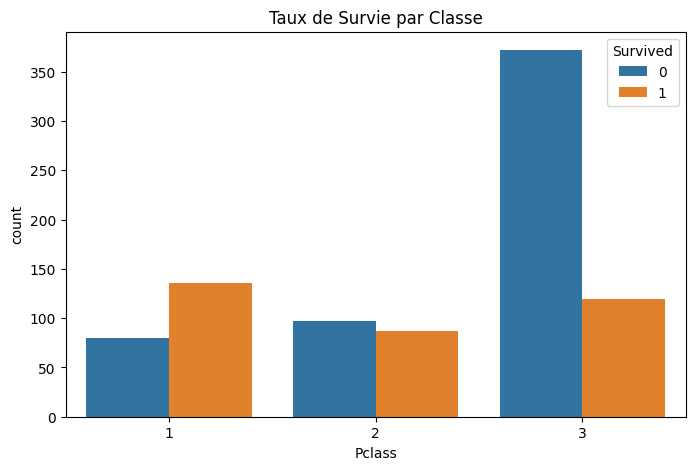

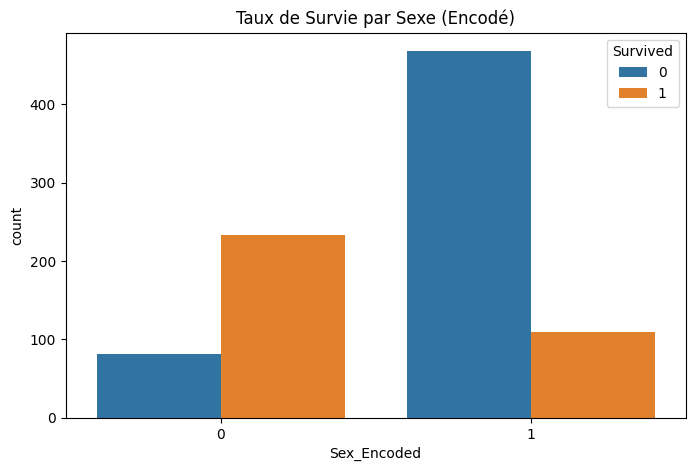

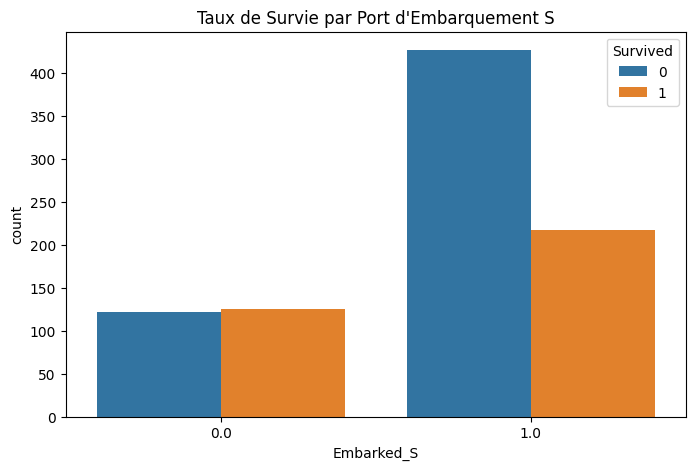

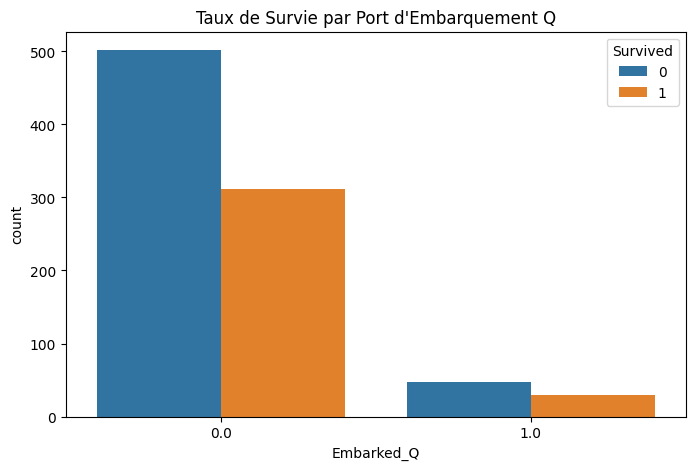

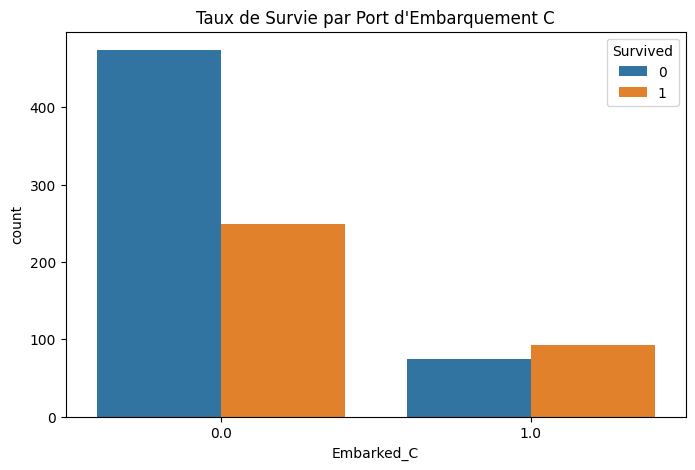

In [113]:
# Countplot pour voir la r√©partition des survivants selon la classe
plt.figure(figsize=(8, 5))
print(df.columns)

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Taux de Survie par Classe")
plt.show()

# Countplot pour voir la r√©partition des survivants selon le sexe
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex_Encoded", hue="Survived", data=df)
plt.title("Taux de Survie par Sexe (Encod√©)")
plt.show()

# Countplot pour voir la r√©partition des survivants selon le port d'embarquement
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_S", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement S")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_Q", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement Q")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_C", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement C")
plt.show()


In [114]:
from sklearn.model_selection import train_test_split

df_final = df[['Survived', 'Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Afficher le DataFrame final
print(df_final.head())

   Survived  Pclass  Sex_Encoded       Age      Fare     SibSp     Parch  \
0         0       3            1 -0.565736 -0.502445  0.432793 -0.473674   
1         1       1            0  0.663861  0.786845  0.432793 -0.473674   
2         1       3            0 -0.258337 -0.488854 -0.474545 -0.473674   
3         1       1            0  0.433312  0.420730  0.432793 -0.473674   
4         0       3            1  0.433312 -0.486337 -0.474545 -0.473674   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         1.0         0.0         0.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


In [115]:
# Importation des librairies n√©cessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des donn√©es (assurez-vous que df est d√©j√† d√©fini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des donn√©es

# S√©lection des algorithmes
models = {
    "R√©gression Logistique": LogisticRegression(),
    "Arbre de D√©cision": DecisionTreeClassifier(),
    "For√™t Al√©atoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilit√©s
    "Naive Bayes": GaussianNB(),
    "R√©seaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# S√©paration des donn√©es en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# S√©paration du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des donn√©es
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et pr√©diction pour chaque mod√®le
results = {}
for name, model in models.items():
    # Cross-validation √† 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entra√Ænement du mod√®le
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des m√©triques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un probl√®me binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilit√©s pr√©dites pour SVC et les autres mod√®les compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilit√© pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le mod√®le ne supporte pas predict_proba

    # Stockage des r√©sultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des r√©sultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
R√©gression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de D√©cision           0.756090      0.760835       0.789887  0.772388   
For√™t Al√©atoire             0.796219      0.800963       0.805914  0.779851   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
R√©seaux de neurones         0.796142      0.813804       0.800870  0.817164   

                        Precision    Recall  F1 Score   AUC-ROC  
R√©gression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de D√©cision        0.735849  0.702703  0.718894  0.760888  
For√™t Al√©atoire          0.740741  0.720721  0.730594  0.864377  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.8

In [ ]:
# Importation des librairies n√©cessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des donn√©es (assurez-vous que df est d√©j√† d√©fini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des donn√©es

# S√©lection des algorithmes
models = {
    "R√©gression Logistique": LogisticRegression(),
    "Arbre de D√©cision": DecisionTreeClassifier(),
    "For√™t Al√©atoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilit√©s
    "Naive Bayes": GaussianNB(),
    "R√©seaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# S√©paration des donn√©es en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# S√©paration du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des donn√©es
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et pr√©diction pour chaque mod√®le
results = {}
for name, model in models.items():
    # Cross-validation √† 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entra√Ænement du mod√®le
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des m√©triques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un probl√®me binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilit√©s pr√©dites pour SVC et les autres mod√®les compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilit√© pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le mod√®le ne supporte pas predict_proba

    # Stockage des r√©sultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des r√©sultats
results_df = pd.DataFrame(results).T
print(results_df)


In [ ]:
# Importation des librairies n√©cessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des donn√©es (assurez-vous que df est d√©j√† d√©fini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des donn√©es

# S√©lection des algorithmes
models = {
    "R√©gression Logistique": LogisticRegression(),
    "Arbre de D√©cision": DecisionTreeClassifier(),
    "For√™t Al√©atoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilit√©s
    "Naive Bayes": GaussianNB(),
    "R√©seaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# S√©paration des donn√©es en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# S√©paration du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des donn√©es
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et pr√©diction pour chaque mod√®le
results = {}
for name, model in models.items():
    # Cross-validation √† 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entra√Ænement du mod√®le
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des m√©triques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un probl√®me binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilit√©s pr√©dites pour SVC et les autres mod√®les compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilit√© pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le mod√®le ne supporte pas predict_proba

    # Stockage des r√©sultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des r√©sultats
results_df = pd.DataFrame(results).T
print(results_df)


In [ ]:
# Installer/mettre √† jour les librairies n√©cessaires
!pip install --upgrade pandas scikit-learn matplotlib seaborn numpy plotly --force-reinstall

# Import des biblioth√®ques n√©cessaires
import pandas as pf

# Importer les biblioth√®ques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
# Lire le fichier
df = pf.read_csv("bank-additional-full.csv", sep=";")

# Afficher toutes les colonnes sans coupure
pf.set_option("display.max_columns", None)

# Afficher les premi√®res lignes du dataset
df.head()

In [ ]:
# Lire le fichier bank-additional-full.csv
df = pf.read_csv("bank-additional-full.csv", sep=";")

# V√©rifier toutes les colonnes (cat√©gorielles et num√©riques)
all_columns = df.columns

# Rechercher "unknown" dans toutes les colonnes
unknown_counts = df[all_columns].apply(lambda col: (col.astype(str) == "unknown").sum())

# Affichage des r√©sultats pour toutes les colonnes, m√™me celles sans "unknown"
print("Nombre de valeurs 'unknown' dans chaque colonne :")
print(unknown_counts)


In [ ]:
# Identifier les colonnes cat√©gorielles
categorical_columns = df.select_dtypes(include=["object"]).columns

# Liste des colonnes √† encoder avec One-Hot Encoding
one_hot_cols = ["job", "marital", "contact", "month", "day_of_week"]

# Liste des colonnes √† encoder avec Label Encoding (optionnel)
label_cols = ["education"]  # Si l'on veut encoder les niveaux d'√©ducation dans un ordre

# Appliquer One-Hot Encoding sans modifier les "unknown"
df_encoded = df.copy()
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

for col in one_hot_cols:
    # Remplacer temporairement "unknown" par une valeur unique
    temp_col = df_encoded[col].replace("unknown", "TO_KEEP")
    
    # Appliquer One-Hot Encoding
    encoded_values = encoder.fit_transform(temp_col.values.reshape(-1, 1))
    encoded_df = pf.DataFrame(encoded_values, columns=encoder.get_feature_names_out([col]))
    
    # Restaurer les "unknown"
    encoded_df[temp_col == "TO_KEEP"] = 0  # On met 0 pour √©viter un biais d'encodage
    
    # Ajouter au DataFrame original
    df_encoded = pf.concat([df_encoded, encoded_df], axis=1)
    
    # Supprimer l'ancienne colonne
    df_encoded.drop(columns=[col], inplace=True)

# Appliquer Label Encoding si n√©cessaire
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].apply(lambda x: x if x == "unknown" else le.fit_transform([x])[0])

# Afficher les premi√®res lignes du DataFrame encod√©
df_encoded

In [ ]:
# Identifier les colonnes cat√©gorielles
categorical_columns = df.select_dtypes(include=["object"]).columns

# Liste des colonnes √† encoder avec One-Hot Encoding
one_hot_cols = ["job", "marital", "contact", "poutcome", "month", "day_of_week"]

# Liste des colonnes √† encoder avec Label Encoding (optionnel)
label_cols = ["education"]  # Si l'on veut encoder les niveaux d'√©ducation dans un ordre

# Copier le DataFrame pour l'encodage
df_encoded = df.copy()

# Appliquer One-Hot Encoding sans modifier les "unknown"
encoder = OneHotEncoder(drop="first", sparse_output=False)

for col in one_hot_cols:
    # S√©parer les valeurs "unknown" pour les pr√©server
    mask_unknown = df_encoded[col] == "unknown"
    
    # Appliquer One-Hot Encoding sur les valeurs connues
    temp_col = df_encoded[~mask_unknown][col].to_numpy().reshape(-1, 1)
    encoded_values = encoder.fit_transform(temp_col)
    encoded_df = pf.DataFrame(encoded_values, columns=encoder.get_feature_names_out([col]), index=df_encoded[~mask_unknown].index)
    
    # Remettre "unknown" dans la colonne originale
    df_encoded[col] = df_encoded[col].replace("unknown", "TO_KEEP")
    
    # Fusionner les nouvelles colonnes
    df_encoded = df_encoded.join(encoded_df)
    
    # Restaurer les valeurs "unknown"
    df_encoded[col] = df_encoded[col].replace("TO_KEEP", "unknown")

# Appliquer Label Encoding si n√©cessaire, sans modifier les "unknown"
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].apply(lambda x: le.fit_transform([x])[0] if x != "unknown" else x)

# Afficher les premi√®res lignes du DataFrame encod√©
print(" Aper√ßu du dataset apr√®s encodage :")
print(df_encoded.head())

# V√©rifier que les valeurs "unknown" sont toujours pr√©sentes
unknown_counts_after = df_encoded.apply(lambda col: (col == "unknown").sum())

# Afficher uniquement les colonnes qui contiennent encore des valeurs "unknown"
print("\n Nombre de valeurs 'unknown' par colonne apr√®s encodage :")
print(unknown_counts_after[unknown_counts_after > 0])

In [ ]:
# Identifier les colonnes avec des valeurs "unknown"
unknown_columns = df_encoded.columns[df_encoded.apply(lambda col: (col == "unknown").sum() > 0)]

# Copier le DataFrame pour imputer les valeurs manquantes
df_imputed = df_encoded.copy()

# Imputer les valeurs manquantes (remplacer "unknown" par la valeur la plus fr√©quente)
for col in unknown_columns:
    most_frequent_value = df_imputed[col].mode()[0]  # Trouver la valeur la plus fr√©quente
    df_imputed[col] = df_imputed[col].replace("unknown", most_frequent_value).infer_objects(copy=False)  # Correction

# Afficher les valeurs "unknown" restantes (v√©rification)
unknown_counts_after_imputation = df_imputed.apply(lambda col: (col == "unknown").sum())

# Affichage des r√©sultats
print("\nüöÄ Nombre de valeurs 'unknown' apr√®s imputation :")
print(unknown_counts_after_imputation[unknown_counts_after_imputation > 0])


In [ ]:
# Import des biblioth√®ques n√©cessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# S√©lection des colonnes sp√©cifiques
selected_columns = ["age", "duration", "campaign", "emp.var.rate", 
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"]

# D√©terminer dynamiquement le nombre de lignes et de colonnes pour l'affichage
num_cols = len(selected_columns)
num_rows = int(np.ceil(num_cols / 3))  # 3 colonnes par ligne

# Tracer les histogrammes
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Convertir la grille en une liste d'axes

for i, col in enumerate(selected_columns):
    df_imputed[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(col)

# Supprimer les axes inutilis√©s si le nombre de colonnes < nombre de sous-graphiques
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Distribution des variables s√©lectionn√©es", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Import des biblioth√®ques n√©cessaires
import matplotlib.pyplot as plt
import seaborn as sns

# S√©lection des colonnes sp√©cifiques pour le boxplot
selected_columns = ["age", "duration", "campaign", "emp.var.rate", 
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"]


# Boxplot pour toutes les variables num√©riques
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[selected_columns], orient='h')
plt.title('Boxplots des variables num√©riques')
plt.show()


In [ ]:
# S√©lection des variables num√©riques
selected_columns = ["age", "duration", "campaign", "emp.var.rate", 
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"]

# Matrice de corr√©lation Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_columns].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corr√©lation (Pearson) - Variables Num√©riques")
plt.show()

In [ ]:
# Matrice de corr√©lation Spearman (utile si les relations ne sont pas lin√©aires)
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_columns].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corr√©lation (Spearman) - Variables Num√©riques")
plt.show()

In [ ]:
# Import des biblioth√®ques n√©cessaires
import seaborn as sns
import matplotlib.pyplot as plt

# S√©lection des colonnes cat√©gorielles restantes (non utilis√©es pr√©c√©demment)
categorical_columns = df_imputed.select_dtypes(include=["object"]).columns
unused_columns = [col for col in categorical_columns if col not in selected_columns + ["y"]]

# Tracer des countplots pour chaque colonne cat√©gorielle restante
for col in unused_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, order=df_imputed[col].value_counts().index)
    plt.title(f"R√©partition de {col}")
    plt.xticks(rotation=45)  # Rotation des √©tiquettes si n√©cessaire
    plt.show()